In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [11]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import mean_squared_error, r2_score

X = np.array([2, 4, 6, 8, 10, 12, 14]).reshape(-1, 1)
y = np.array([1, 2, 5, 8, 12, 14, 15])
Xst8 = np.array([2, 4, 6, 8, 10, 12, 14])

In [12]:
def MSE(x): 
    n=len(x)
    p=(x-np.mean(x))**2
    return (sum(p)/n)

mse=MSE(y)
print('---1---\n',mse)

cond=lambda v: v <= 9 #---->2
ytrue=y[cond(Xst8)]
yfalse=y[~(cond(Xst8))]

msetrue=MSE(ytrue)
msefalse=MSE(yfalse)
print(f'---3&4---\ntrue mse: {msetrue} , true mean: {np.mean(ytrue)}\nfalse mse: {msefalse} , false mean: {np.mean(yfalse)}')
weighted_mse = (len(ytrue)/len(y))*msetrue + (len(yfalse)/len(y))*msefalse
print(f'---5---\nweighted mse: {weighted_mse}')
gain = MSE(y) - weighted_mse
print(f'---6---\nmse gain:',gain)

---1---
 27.836734693877556
---3&4---
true mse: 7.5 , true mean: 4.0
false mse: 1.5555555555555556 , false mean: 13.666666666666666
---5---
weighted mse: 4.9523809523809526
---6---
mse gain: 22.884353741496604


Let scikit-learn Build the Tree

Now we let scikit-learn build a regression tree of depth 1 and compare to our manual work

1.Complete the following code:

In [27]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

X = np.array([2, 4, 6, 8, 10, 12, 14]).reshape(-1, 1)
y = np.array([1, 2, 5, 8, 12, 14, 15])

# Regression tree with depth 1
tree = DecisionTreeRegressor(
    criterion="squared_error",  # MSE criterion
    max_depth=1,
    random_state=42
)

# Train the tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Predictions

tree.fit(X_train, y_train) 

# calc MSE and R square
y_pred_test=tree.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print('mse_test -->',mse_test,'\n','r2_test  -->',r2_test)
# Show the tree structure
rules = export_text(tree, feature_names=["x"])
print(rules)

mse_test --> 16.916666666666668 
 r2_test  --> 0.5151273885350318
|--- x <= 9.00
|   |--- value: [6.50]
|--- x >  9.00
|   |--- value: [13.50]



In [50]:
def best_r2(X,y,depth):
    tree = DecisionTreeRegressor(
    criterion="squared_error",  # MSE criterion
    max_depth=depth,
    random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    tree.fit(X_train, y_train) 
    y_pred_test=tree.predict(X_test)
    y_pred_train=tree.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test  = mean_squared_error(y_test, y_pred_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test  = r2_score(y_test, y_pred_test)

    print(f"--- depth = {depth} ---")
    print("Train MSE:", mse_train, " | Train R²:", r2_train)
    print("Test  MSE:", mse_test,  " | Test  R²:", r2_test)
    # Show the tree structure
    rules = export_text(tree, feature_names=["x"])
    print(rules)
best_r2(X,y,2)

        

--- depth = 2 ---
Train MSE: 0.0  | Train R²: 1.0
Test  MSE: 9.666666666666666  | Test  R²: 0.7229299363057324
|--- x <= 9.00
|   |--- x <= 7.00
|   |   |--- value: [5.00]
|   |--- x >  7.00
|   |   |--- value: [8.00]
|--- x >  9.00
|   |--- x <= 12.00
|   |   |--- value: [12.00]
|   |--- x >  12.00
|   |   |--- value: [15.00]



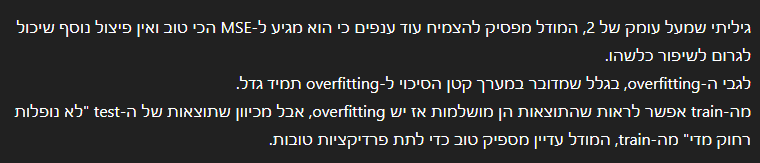